In [1]:
# This cell allows then notebook to discover the package TunnelingExperiment
# Only run this cell once. If run a second time, hit "Kernel->Reset" to restart
# the notebook, then run once.

import os
moduledir = os.path.dirname( os.getcwd() )

os.chdir(moduledir) # Move up one directory so we can import modules

## Variable Definitions

To generate a $dI/dV$ spectrum over all gate voltages, we first import `STM` from the `TunnelingExperiment` module. A tunneling experiment performed on BLG is provided by the object `STM.BLGinSTM`. The parameters it takes are as follows

* The distance between the top gate (tip) and sample `d1` in units nm
* The distance between the bottom gate and sample `d2` in units nm
* The *relative* permittivity between the tip and sample `e1`
* The *relative* permittivity between the bottom gate and sample `e2`
* Temperature `T` in units K
* The work function of the tip `Wtip` in units eV

## Running a Simulation

We need `numpy` to make arrays of voltages and an `STM` to run the simlulation.

In [2]:
import numpy as np

from TunnelingExperiment import STM

A common example is to have a layer BLG on a ~20 nm thick piece of hBN on a 285 nm thick SiO$_2$ oxide. This sets `d2=20+285=305` nm. The relative permittivity of both hBN and SiO$_2$ is roughly 4, so we set `e2=4`. The tip height varies substantially, but in this example, we'll set `d_1=1` nm. Since the tip sits in vacuum, `e1=1`. If the tip is made of Pt-Ir, then `Wtip=5.2` eV approximately.

In [9]:
d1 = 1 # nm between tip and sample
d2 = 290 # nm between backgate and sample
e1 = 1 # relative permittivity between tip and sample
e2 = 4 # relative permittivity between backgate and sample
T = 0 # Kelvin
Wtip = 4.8 # eV for work function of the Pt-Ir tip

We define the experiment using the command below.

In [10]:
experiment = STM.BLGinSTM(d1,d2,e1,e2,T,Wtip)

From the experiment, we want to compute the current $I$ (or more usually the differential conductance $dI/dV$) over a range of pairs of voltages $(V_T,V_B)$. A typical range of voltages to choose has $V_T$ on the order of $\pm 0.1$ V to $\pm 1$ V and $V_B$ on the order of $\pm 50$ V. To produce a nice image, a recommended number of points for each gate is 100. However, be warned that it takes a long time to generate such plots.

In [11]:
VT = np.linspace(-0.4,0.4,num=60)
VB = np.linspace(-70,70,num=60)

Once the parameters and range of voltages have been chosen, the `experiment` can be run by calling the `generate_tunnelcurrent` method. You will see error messages referring to `Roundoff error`. Ignore these.

In [12]:
experiment.generate_tunnelcurrent(VT,VB)

Computing tunnel currents


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


Finally, to view the results, we call `plot_dIdV`.

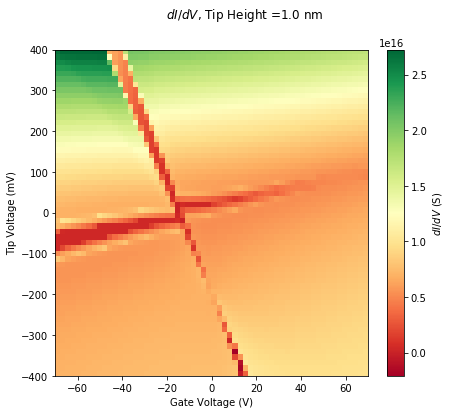

In [13]:
experiment.plot_dIdV()

We can choose to normalize this plot to show $(dI/dV)/(I/V)$.

C:\Users\holdm\Documents\Research\Box Sync\Research\BrarGroup-OlderStuff\Master\BLGinSTM\TunnelingExperiment\STM.py:982: RuntimeWarning: divide by zero encountered in true_divide
  dIdV = dIdV / IV


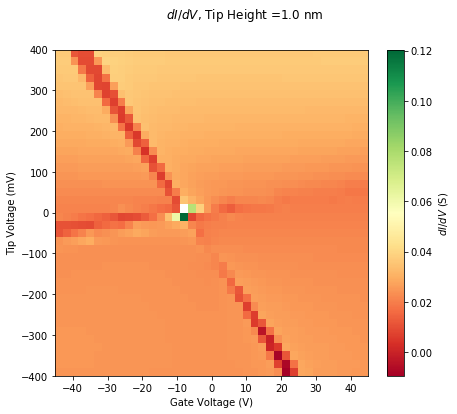

In [18]:
experiment.plot_dIdV(norm=True)

We can also take linecuts to produce a waterfall plot. This functionality is available from `experiment.plot_dIdV`. Simply pass in an array of tip voltages (some large number) and an array of gate voltages. Some formatting needs to be done, but it is available.

Computing tunnel currents


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


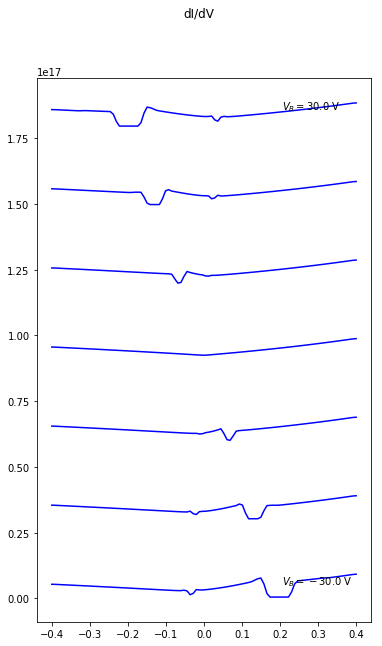

In [6]:
VT_wf = np.linspace(-0.4,0.4,num=100)
VB_wf = np.linspace(-30,30,num=7)

experiment.plot_dIdV_waterfall(VT_wf,VB_wf)

## Including Charge Screening

In reality, the charge rearranges itself between the layers of the BLG. By default, the object `TunnelingExperiments.BLGinSTM` does NOT take this into account, since it adds time to the calculation. In order to include this effect, we define a new object with the argument `screening=True`.

In [9]:
experiment_with_screening = STM.BLGinSTM(d1,d2,e1,e2,T,Wtip,screening=True)

In [10]:
experiment_with_screening.generate_tunnelcurrent(VT,VB)

Computing tunnel currents


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


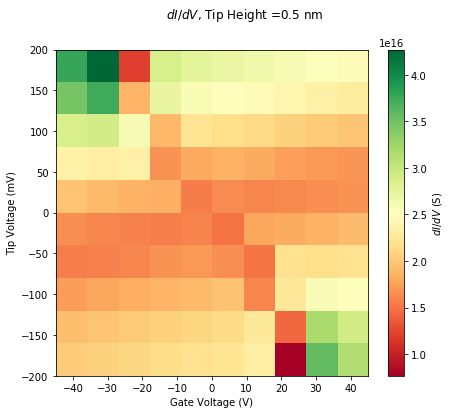

In [12]:
experiment_with_screening.plot_dIdV()